In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_digits

# Load the digit dataset
digits = load_digits()

# Create a DataFrame
df = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])

# Add target column to the DataFrame
df['target'] = digits.target


In [5]:
X = df.drop(columns=['target'])
y = df['target']

In [6]:
df.shape

(1797, 65)

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1437, 64) (1437,) (360, 64) (360,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Model Tunning

##### Logistic Regression

In [12]:
lr = LogisticRegression()

param_grid_logistic = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search=GridSearchCV(lr,param_grid_logistic, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Score: 0.96


##### Decision Tree

In [13]:
dtree = DecisionTreeClassifier()

param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10]
}

grid_search=GridSearchCV(dtree,param_grid_decision_tree, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Best Cross-Validation Score: 0.85


##### Random Forest

In [14]:
rfc = RandomForestClassifier()

param_grid_random_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10]
}

grid_search=GridSearchCV(rfc,param_grid_random_forest, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.98


##### Support Vector Machine

In [15]:
svc = SVC()

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid_search=GridSearchCV(svc,param_grid_svm, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.99


##### Naive Bayes

In [16]:
mnb = MultinomialNB()

param_grid_multinomial_nb = {
    'alpha': [0.1, 0.5, 1.0, 1.5]
}

grid_search=GridSearchCV(mnb,param_grid_multinomial_nb, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'alpha': 1.5}
Best Cross-Validation Score: 0.90


## Model Testing

##### Logistic Regression

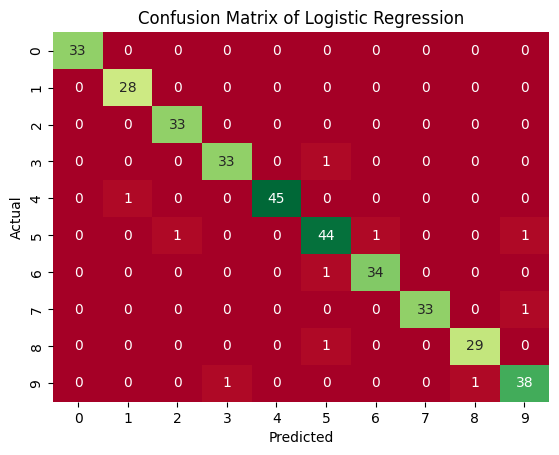

In [22]:
lr = LogisticRegression(C=0.1,penalty='l2')

lr.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

prediction = lr.predict(X_test)
cm = confusion_matrix(y_test, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = lr.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction,average=None).mean()))
print("Recall = ",format(recall_score(y_train,prediction,average=None).mean()))
print("F-1 Score = ",format(f1_score(y_train,prediction,average=None).mean()))

Precision =  0.9993548387096775
Recall =  0.9993055555555556
F-1 Score =  0.9993279433487816


##### Decision Tree

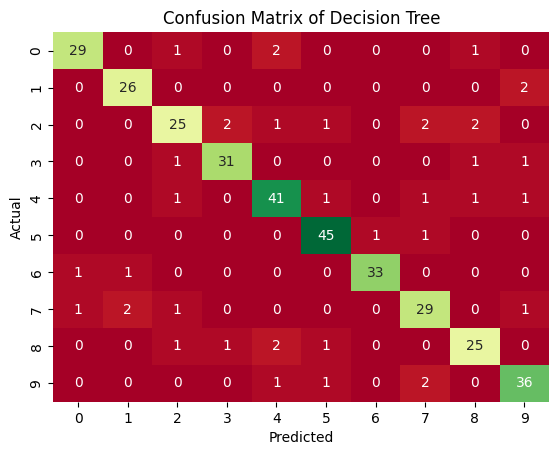

In [29]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth= None,min_samples_split= 2)

dtree.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

prediction = dtree.predict(X_test)
cm = confusion_matrix(y_test, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix of Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = dtree.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction,average=None).mean()))
print("Recall = ",format(recall_score(y_train,prediction,average=None).mean()))
print("F-1 Score = ",format(f1_score(y_train,prediction,average=None).mean()))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


##### Random Forest

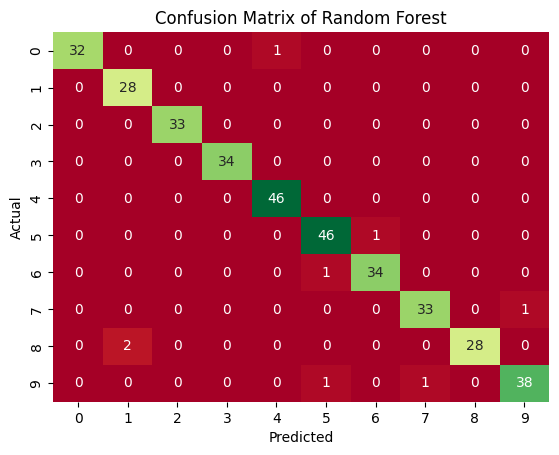

In [31]:
rfc = RandomForestClassifier(max_depth= 30,min_samples_split= 2,n_estimators= 200)

rfc.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

prediction = rfc.predict(X_test)
cm = confusion_matrix(y_test, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix of Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = rfc.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction,average=None).mean()))
print("Recall = ",format(recall_score(y_train,prediction,average=None).mean()))
print("F-1 Score = ",format(f1_score(y_train,prediction,average=None).mean()))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


##### Support Vector Machine

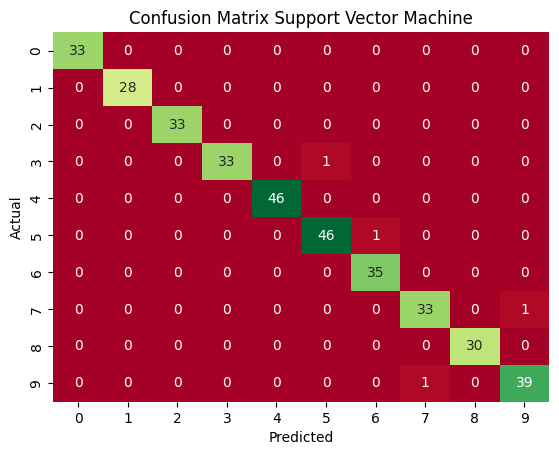

In [25]:
svc = SVC(C= 10,gamma= 0.001,kernel= 'rbf')

svc.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

prediction = svc.predict(X_test)
cm = confusion_matrix(y_test, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix Support Vector Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = svc.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction,average=None).mean()))
print("Recall = ",format(recall_score(y_train,prediction,average=None).mean()))
print("F-1 Score = ",format(f1_score(y_train,prediction,average=None).mean()))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


##### Naive Bayes 

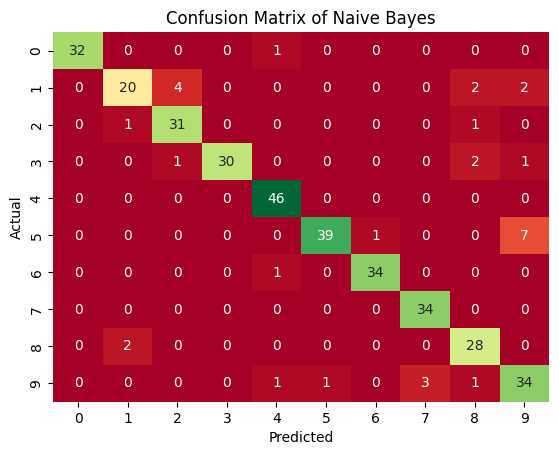

In [27]:
mnb = MultinomialNB(alpha= 1.5)

mnb.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

prediction = mnb.predict(X_test)
cm = confusion_matrix(y_test, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix of Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:

from sklearn.metrics import recall_score,precision_score,f1_score

prediction = mnb.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction,average=None).mean()))
print("Recall = ",format(recall_score(y_train,prediction,average=None).mean()))
print("F-1 Score = ",format(f1_score(y_train,prediction,average=None).mean()))

Precision =  0.9109608874853183
Recall =  0.906329683796527
F-1 Score =  0.9064852033326947
